In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import os
from PIL import Image
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data ='drive/MyDrive/baithi/emoji_data/train1'
validation ='drive/MyDrive/baithi/emoji_data/validation1'
class_names=['anger','happy','neutral','sad']

In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255)

In [ ]:
training_data = kieuhinh.flow_from_directory(data,target_size=(96, 96),batch_size=32,class_mode='categorical',shuffle = True,color_mode = "rgb")

Found 9996 images belonging to 4 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory(validation,target_size=(96, 96),batch_size=32,class_mode='categorical',shuffle = True,color_mode = "rgb")

Found 392 images belonging to 4 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3), activation='relu', input_shape=(96,96,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation= 'relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 94, 94, 64)        1792      
                                                                 
 batch_normalization_5 (Batc  (None, 94, 94, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 47, 47, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_88 (Conv2D)          (None, 45, 45, 128)       73856     
                                                                 
 batch_normalization_6 (Batc  (None, 45, 45, 128)      512       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer=Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model_path='drive/MyDrive/baithi/model/emoji.h5'
checkpointer = ModelCheckpoint(model_path, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
history=model.fit(training_data,epochs=40,verbose=1,validation_data=validation_data, callbacks=[callback_list])

Epoch 1/40
313/313 [==============================] - ETA: 0s - loss: 1.7901 - accuracy: 0.2871
Epoch 1: loss improved from inf to 1.79012, saving model to drive/MyDrive/baithi/model/emoji.h5
313/313 [==============================] - 73s 231ms/step - loss: 1.7901 - accuracy: 0.2871 - val_loss: 1.4239 - val_accuracy: 0.2245
Epoch 2/40
313/313 [==============================] - ETA: 0s - loss: 1.3885 - accuracy: 0.3579
Epoch 2: loss improved from 1.79012 to 1.38846, saving model to drive/MyDrive/baithi/model/emoji.h5
313/313 [==============================] - 71s 227ms/step - loss: 1.3885 - accuracy: 0.3579 - val_loss: 1.2314 - val_accuracy: 0.4337
Epoch 3/40
313/313 [==============================] - ETA: 0s - loss: 1.2193 - accuracy: 0.4322
Epoch 3: loss improved from 1.38846 to 1.21928, saving model to drive/MyDrive/baithi/model/emoji.h5
313/313 [==============================] - 71s 226ms/step - loss: 1.2193 - accuracy: 0.4322 - val_loss: 1.3681 - val_accuracy: 0.2959
Epoch 4/40
313

In [ ]:
model_gender=load_model('drive/MyDrive/baithi/model/emoji.h5')

In [ ]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#khai báo thư viện
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

In [ ]:
image_path='drive/MyDrive/baithi/emoji_data/test/happy.jpg'

1: sad


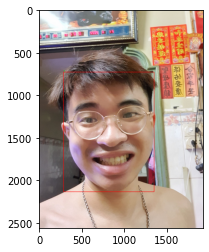

In [ ]:
class_names=['anger','happy','neutral','sad']
img=plt.imread(image_path)
detector=MTCNN() ## THU VIEN DA TRAIN SAN
faces=detector.detect_faces(img)
i=0
for face in faces:
  i = i+1
  x,y,w,h=face['box']
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  img_cat=img[y:y+h,x:x+w]
  img_cat=np.resize(img_cat,(96,96,3))
  img_cat=img_cat.astype('float32')
  img_cat/=255
  output_gender=class_names[np.argmax(model_gender.predict(img_cat.reshape(-1,96,96,3)))]
  output_str = str(i) + ": "+  output_gender
  print(output_str)
  col = (0,255,0)
  cv2.putText(img, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)
plt.imshow(img)

In [ ]:
training_data.class_indices

{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}